#### Name: Eric Lindgren
#### CID: ericlin
#### PSN: 970222-1954

## Chi-squared hypothesis testing

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

Test the null hypothesis that the measured data is constant, with an unknown amplitude. That is, we take our $H_0£$ hypothesis to be $y=$constant.

In [8]:
# Generate data points for three different scenarios
scenarios = {
    "scen1": {
        "amp_annual": 0.0,
        "chi_2": 0
    },
    "scen2": {
        "amp_annual": 5.0,
        "chi_2": 0
    },
    "scen3": {
        "amp_annual": 10.0,
        "chi_2": 0
    }
}

# Generate N=20 data points for a period of Y=5 years
N = 20
Y = 5
T = 365.25


# The constant background
background = 100.

# The std deviation for the normally distributed errors
dy = 5.


for scenario in scenarios:
    # Note - we want the same seed for all scenarios to compare them!
    rand = np.random.RandomState(1)  # Try with 2019 as well 
    t = T * Y * rand.rand(N)
    # amplitude of annual modulation signal
    amp_annual = scenarios[scenario]["amp_annual"]
    y = background + amp_annual * np.sin(2*np.pi*t / T)
    y += dy * rand.randn(N)
    scenarios[scenario]["y"] = y

print(scenarios)

{'scen1': {'amp_annual': 0.0, 'chi_2': 0, 'y': array([105.66884721,  94.50054366,  99.13785896,  95.61070791,
       100.21106873, 102.91407607,  94.49690411, 105.72361855,
       104.5079536 , 102.51247169, 104.50427975,  96.5813607 ,
        99.38554887,  95.32115283,  98.6605596 , 102.65177733,
        96.54169624,  98.01623237,  96.5641365 ,  95.77397179])}, 'scen2': {'amp_annual': 5.0, 'chi_2': 0, 'y': array([108.21702883,  91.52053417,  99.15582488,  95.24463609,
        95.2370138 , 104.10594073,  92.4050622 , 100.77216522,
       104.00106195,  97.81789714, 107.33991483,  98.82053842,
       100.08262848,  98.49403757, 102.45109856, 106.65326278,
        99.12799682,  93.2013992 ,  91.79042361,  95.47593117])}, 'scen3': {'amp_annual': 10.0, 'chi_2': 0, 'y': array([110.76521045,  88.54052468,  99.17379079,  94.87856428,
        90.26295886, 105.2978054 ,  90.31322028,  95.82071188,
       103.4941703 ,  93.12332258, 110.17554992, 101.05971615,
       100.77970808, 101.6669223 , 

In [3]:
# Define and compute the chi-squared statistic for each case
def chi_squared(y, sigma):
    '''Computes the chi-squared statistic for dataset y with fixed standard deviation sigma.'''
    return ((y-y.mean())**2/sigma**2).sum()

# Test
print(f'Chi squared function passing unit test: {1/2==np.round(chi_squared(np.array([1,2,3]),2),3)}')

Chi squared function passing unit test: True


In [4]:
# Calculate chi_squared statistics
for scenario in scenarios:
    y = scenarios[scenario]["y"]
    chi2 = chi_squared(y, dy)
    scenarios[scenario]["chi_2"] = chi2
    print(f'Chi_squared for scenarion {scenario}: {chi2:.3f}')

Chi_squared for scenarion scen1: 11.340
Chi_squared for scenarion scen2: 20.306
Chi_squared for scenarion scen3: 45.022


Degree of freedom is a freedom in both the amount of data and the model parameters. Since we have no model yet, DOF is only made up of our number of data points. Note though that we have used one of our DOFs to calculate the mean in the chi squared statistic - thus our DOF is $len(N)-1$.

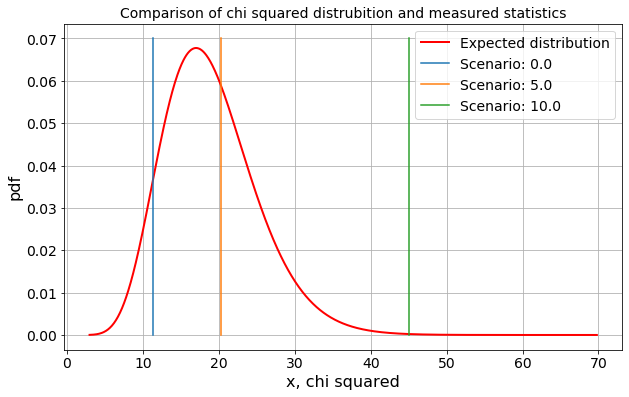

In [5]:
# Degrees of freedom
dof = N-1

# Plot the expected chi squared distribution for the relevant number of degrees of freedom. 

chi2 = stats.chi2

# Generate expected distribution:
x = np.linspace(chi2.ppf(0.00001, dof), chi2.ppf(0.9999999, dof), 1000)  # Generate xvalues between 1% and 99% of the PDF
chi2_dist = chi2.pdf(x, dof)

# Plot
# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, chi2_dist, 'r', linewidth = 2, label="Expected distribution")

plt.grid()
plt.title("Comparison of chi squared distrubition and measured statistics")
ax.set_xlabel("x, chi squared")
ax.set_ylabel("pdf")

# Plot statistics for the different scenarios
for scenario in scenarios:
    chi_2 = scenarios[scenario]["chi_2"]
    ax.plot([chi_2, chi_2], [0, 0.07], label=f'Scenario: {scenarios[scenario]["amp_annual"]}')

plt.legend(loc="best")

In [6]:
# Calculate P-value/significance

# For each statistic, calculate the area above the statistic:
for scenario in scenarios:
    chi_2 = scenarios[scenario]["chi_2"]
    # Define the distribution from the chi2 level and up
    x = np.linspace(chi_2, 100, 1000)  
    chi2_dist = chi2.pdf(x, dof)
    # Calculate the integral
    p_val = np.trapz(chi2_dist, x)
    scenarios[scenario]["p_val"] = p_val
    print(f'The P-value for scenario amp_annual={scenarios[scenario]["amp_annual"]} is: P-value = {p_val:.6f}.')

The P-value for scenario amp_annual=0.0 is: P-value = 0.911875.
The P-value for scenario amp_annual=5.0 is: P-value = 0.376391.
The P-value for scenario amp_annual=10.0 is: P-value = 0.000681.


We reject or accept the null hypothesis $H_0$ purely on how the p-values relate to our confidence level $\alpha$. Since we have done a chi_squared hypothesis test, we have calculated the p-values under the assumption that our null hypothesis is correct; i.e. that the signal is of unknown, constant amplitude. We compare this to our distribution when calculating the p-values. The p-value corresponds to how unlikely it was to obtain the statistic given our $H_0$. A small p-value thus means that the statistic was unlikely, and thus that data yields a high probability of rejecting the null hypothesis.

In [7]:
# What is the confidence in rejecting the null hypothesis in each case?
alpha = 0.01  # Alpha level of 1%

# Check if the p_values for each of the scenarios is below the alpha level

for scenario in scenarios:
    p_val = scenarios[scenario]["p_val"]
    ampl = scenarios[scenario]["amp_annual"]
    #if p_val < alpha:
    #    print(f'Null hypothesis accepted for amplitude {ampl} with confidence {((1-p_val)*100):.4f}%')
    #elif p_val > alpha:
    #    print(f'Null hypothesis rejected for amplitude {ampl} with confidence {((1-p_val)*100):.4f}%')
    print(f'Null hypothesis rejected for amplitude {ampl} with confidence {((1-p_val)*100):.4f}%')

Null hypothesis rejected for amplitude 0.0 with confidence 8.8125%
Null hypothesis rejected for amplitude 5.0 with confidence 62.3609%
Null hypothesis rejected for amplitude 10.0 with confidence 99.9319%


Redo analysis, but with a different seed.

For seed 2019 we see a completely different picture. Here, our statistics are different, which means that we reject the null hypotheses at different confidence levels for each case than what we did before. This highlights how arbitrary frequentist hypothesis testing is, since this metric thus is very dependent on how it is calculated.